# 로지스틱회귀를 Neural Network 구조로 표현
 - 노드-연결선-노드
# Tensorflow keras 코드 사용 

----

## 로지스틱회귀 - Sequential
- 딥러닝 중 Sequential
- 분류는 accuracy로 평가
- 0.5 이상은 1로 예측

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x.shape, y.shape

# 노드 수 확인 = (30)

((569, 30), (569,))

In [3]:
# 청소
keras.backend.clear_session()

# 모델 선언
model = keras.models.Sequential()

# 모델 연결
model.add( keras.layers.Input(shape=(30,)) )
model.add( keras.layers.Dense(1, activation='sigmoid') )

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'], optimizer='adam')

In [5]:
model.fit(x, y, epochs=10, verbose=1)

y_pred = model.predict(x)

# loss와 accuracy 확인

Epoch 1/10
18/18 [==============================] - 0s 2ms/step - loss: 1.3835 - accuracy: 0.7926
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 1.3522 - accuracy: 0.8155
Epoch 3/10
18/18 [==============================] - 0s 1ms/step - loss: 1.3336 - accuracy: 0.7996
Epoch 4/10
18/18 [==============================] - 0s 1ms/step - loss: 1.3094 - accuracy: 0.8102
Epoch 5/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2928 - accuracy: 0.8084
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 1.2715 - accuracy: 0.8014
Epoch 7/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2653 - accuracy: 0.8172
Epoch 8/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2412 - accuracy: 0.8084
Epoch 9/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2332 - accuracy: 0.8137
Epoch 10/10
18/18 [==============================] - 0s 1ms/step - loss: 1.2075 - accuracy: 0.8049


In [10]:
print(y[:5])
print(y_pred[:5].reshape(-1))

[0 0 0 0 0]
[9.6058208e-01 8.5080399e-20 5.6465402e-11 1.0000000e+00 1.1265929e-11]


## 로지스틱회귀 - Functional
- 딥러닝 중 Functional API
- Sequential, Functional 차이는 유연함 차이
- 모델 선언과 모델 연결의 순서 차이가 있음
- #모델연결에서 ol (il)를 주의

In [6]:
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x.shape, y.shape

# 노드 수 확인 = (30)

((569, 30), (569,))

In [7]:
# 청소
keras.backend.clear_session()

# 모델 연결
il = keras.layers.Input(shape=(30,))
ol = keras.layers.Dense(1, activation='sigmoid')(il)

# 모델 선언
model = keras.models.Model(il, ol)

# 모델 설정
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'], optimizer='adam')

In [8]:
hist = model.fit(x, y, epochs=10, verbose=1)

y_pred = model.predict(x)

Epoch 1/10
18/18 [==============================] - 0s 1ms/step - loss: 116.7832 - accuracy: 0.6274
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 98.0577 - accuracy: 0.6274
Epoch 3/10
18/18 [==============================] - 0s 1ms/step - loss: 79.9318 - accuracy: 0.6274
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 61.0872 - accuracy: 0.6274
Epoch 5/10
18/18 [==============================] - 0s 1ms/step - loss: 42.6550 - accuracy: 0.6309
Epoch 6/10
18/18 [==============================] - 0s 1ms/step - loss: 25.2999 - accuracy: 0.6467
Epoch 7/10
18/18 [==============================] - 0s 1ms/step - loss: 11.2157 - accuracy: 0.6766
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 5.1331 - accuracy: 0.6397
Epoch 9/10
18/18 [==============================] - 0s 1ms/step - loss: 4.6235 - accuracy: 0.5923
Epoch 10/10
18/18 [==============================] - 0s 1ms/step - loss: 4.4907 - accuracy: 0.6028


In [9]:
print(y[:5])
print(y_pred[:5].reshape(-1))

[0 0 0 0 0]
[0.0000000e+00 2.3337820e-06 4.9956047e-06 2.0131150e-13 1.0000000e+00]


In [10]:
model.summary()

# 30 + 1 -> 1 : bias

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


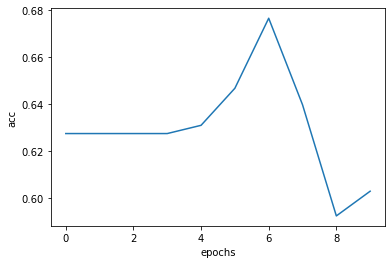

In [19]:
plt.plot(hist.history['accuracy'])

plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()